# Projet 3 : Concevez une application au service de la santé publique

## Appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation pour Santé Publique France

Concernant les données, ces dernières sont fournies par Open Food Facts. Les variables sont définies à l'adresse suivante : https://world.openfoodfacts.org/data/data-fields.txt . 

Les champs sont séparés en quatre sections :
- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.


**Application :**

L’application est nommée "*RegAl*".

Avec un simple scan du code barre, elle permet de déterminer si un produit est adapté ou non à un certain régime alimentaire préalablement renseigné dans l’application. Elle peut également conseiller des produits de la même catégorie qui seraient plus adaptés au régime choisi.
Elle permet ainsi aux personnes suivants des régimes alimentaires particuliers de pouvoir sélectionner leurs produits plus facilement. 

Exemple de choix de régimes :
-	Régime sans gluten
-	Régime faible en sel 
-	Régime sportif (riche protéines)
-   Régime faible en sucres
-   Régime faible en gras
-   Régime riche en fibres 


## Nettoyage des données

<a id="0"></a> <br>
# Table of Contents  

1. [Premières observations sur le data set](#1) 
1. [Observations dupliquées](#2) 
1. [Géographie](#3)    
1. [Sélection des features](#4)     
    * [4.1 Taux de remplissage](#5)
    * [4.2 Features](#6) 
1. [Valeurs aberrantes](#7) 
1. [Valeurs manquantes](#8)
    * [6.1 Premières observations](#9)
    * [6.2 Traitement des colonnes de valeurs nutritionnelles](#10)
        * [6.2.a Traitement de fiber_100g](#11)
        * [6.2.b Traitement de fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g](#12)
        * [6.2.c Traitement de proteins_100g](#13)
        * [6.2.d Traitement de la colonne energy_100g](#14)
    * [6.3 Traitement du nutriscore](#15)
    * [6.4 Traitement du nutrigrade](#16)
    * [6.5 Traitement de la variable catégorie](#17)
    * [6.6 Traitement de traces_fr](#18)
    * [6.7 Traitement de ingredients_from_palm_oil_n](#19)
1. [Sauvegarde des données](#20) 

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import collections
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import fonctions as fc

In [32]:
# Paramètres d'affichage
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

##  <a id="1"></a> 1. Premières observations sur le data set

In [33]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep = '\t'
                   #,low_memory=False
                  )

/Users/oceaneyouyoutte/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Le téléchargement du data set a été réalisé en date du 05/01/2023 (changements réguliers).

In [34]:
data_original = data.copy()

In [35]:
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [36]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

On constate que les variables sont légèrement différentes de celles présentées sur le site d'Open Food Facts. En effet, il y a des variables supplémentaires et d'autres qui ont été supprimées par rapport à ce qui est recensé sur le site.

In [37]:
data.shape

(320772, 162)

Le data set est composé de 320 772 observations et 162 variables.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [39]:
fc.missing_general(data)

Nombre total de cellules manquantes : 39608589
Nombre de cellules manquantes en % : 76.22%


Le data set comporte donc 76.22% de données manquantes, ce qui est plutôt important. 

In [40]:
fc.valeurs_manquantes(data)

,Variable,Missing values,Missing (%)
0,code,23,0.000072
1,url,23,0.000072
2,creator,2,0.000006
3,created_t,3,0.000009
4,created_datetime,9,0.000028
5,last_modified_t,0,0.000000
6,last_modified_datetime,0,0.000000
7,product_name,17762,0.055373
8,generic_name,267977,0.835413
9,quantity,215953,0.673229


On constate que le nombre de données manquantes diffère énormément en fonction des variables. Certaines ont 0% de valeurs manquantes tandis que d'autres ont 100%.

##  <a id="2"></a> 2. Observations dupliquées

In [41]:
fc.data_duplicated(data)

0

La variable *code* est supposée unique, nous pouvons donc analyser les doublons en fonction de celle-ci.

In [42]:
fc.row_duplicated(data,'code')

133

In [43]:
fc.duplicated(data,'code')

Le nombre de lignes dupliquées en fonction de code est : 133
Suppression des duplicatas effectuée.
La nouvelle taille du data frame est : (320639, 162)


## <a id="3"></a> 3. Géographie

In [44]:
data_filtered = fc.pays_france(data)
data_filtered.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-c

In [45]:
data_filtered = data_filtered.reset_index(drop=True)

In [46]:
data_filtered.shape

(99008, 162)

Ce filtrage réduit notre data frame à 99 008 observations. 

In [47]:
# On supprime la colonne 'countries_fr' car elle n'est plus utile
data_filtered.drop('countries_fr', axis=1, inplace=True)

##  <a id="4"></a> 4. Sélection des features

###  <a id="5"></a> 4.1 Taux de remplissage

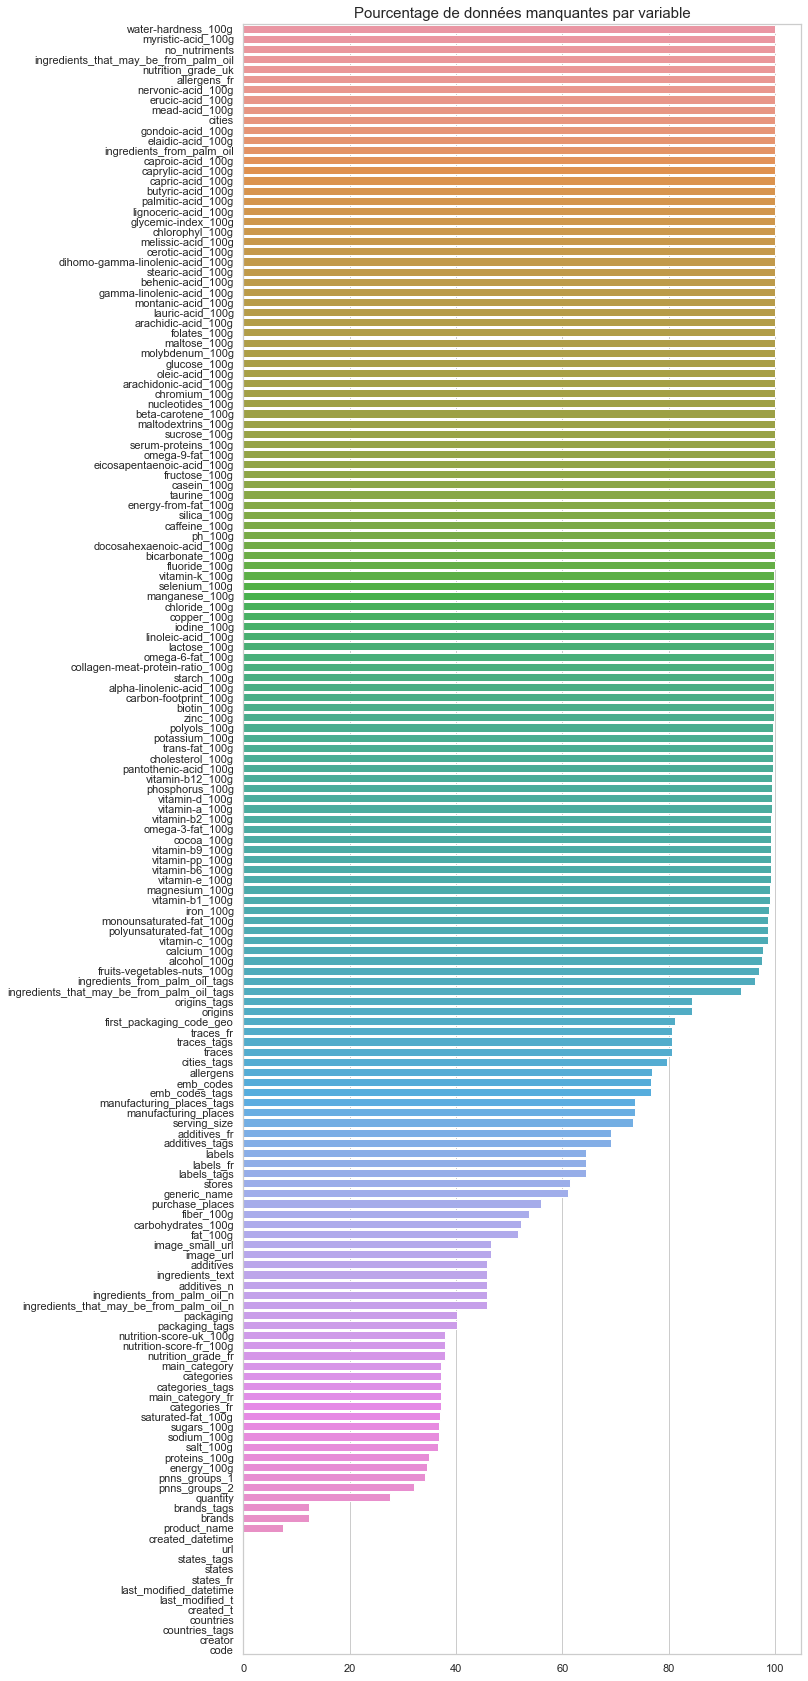

In [49]:
fc.barplot_missing(data_filtered)

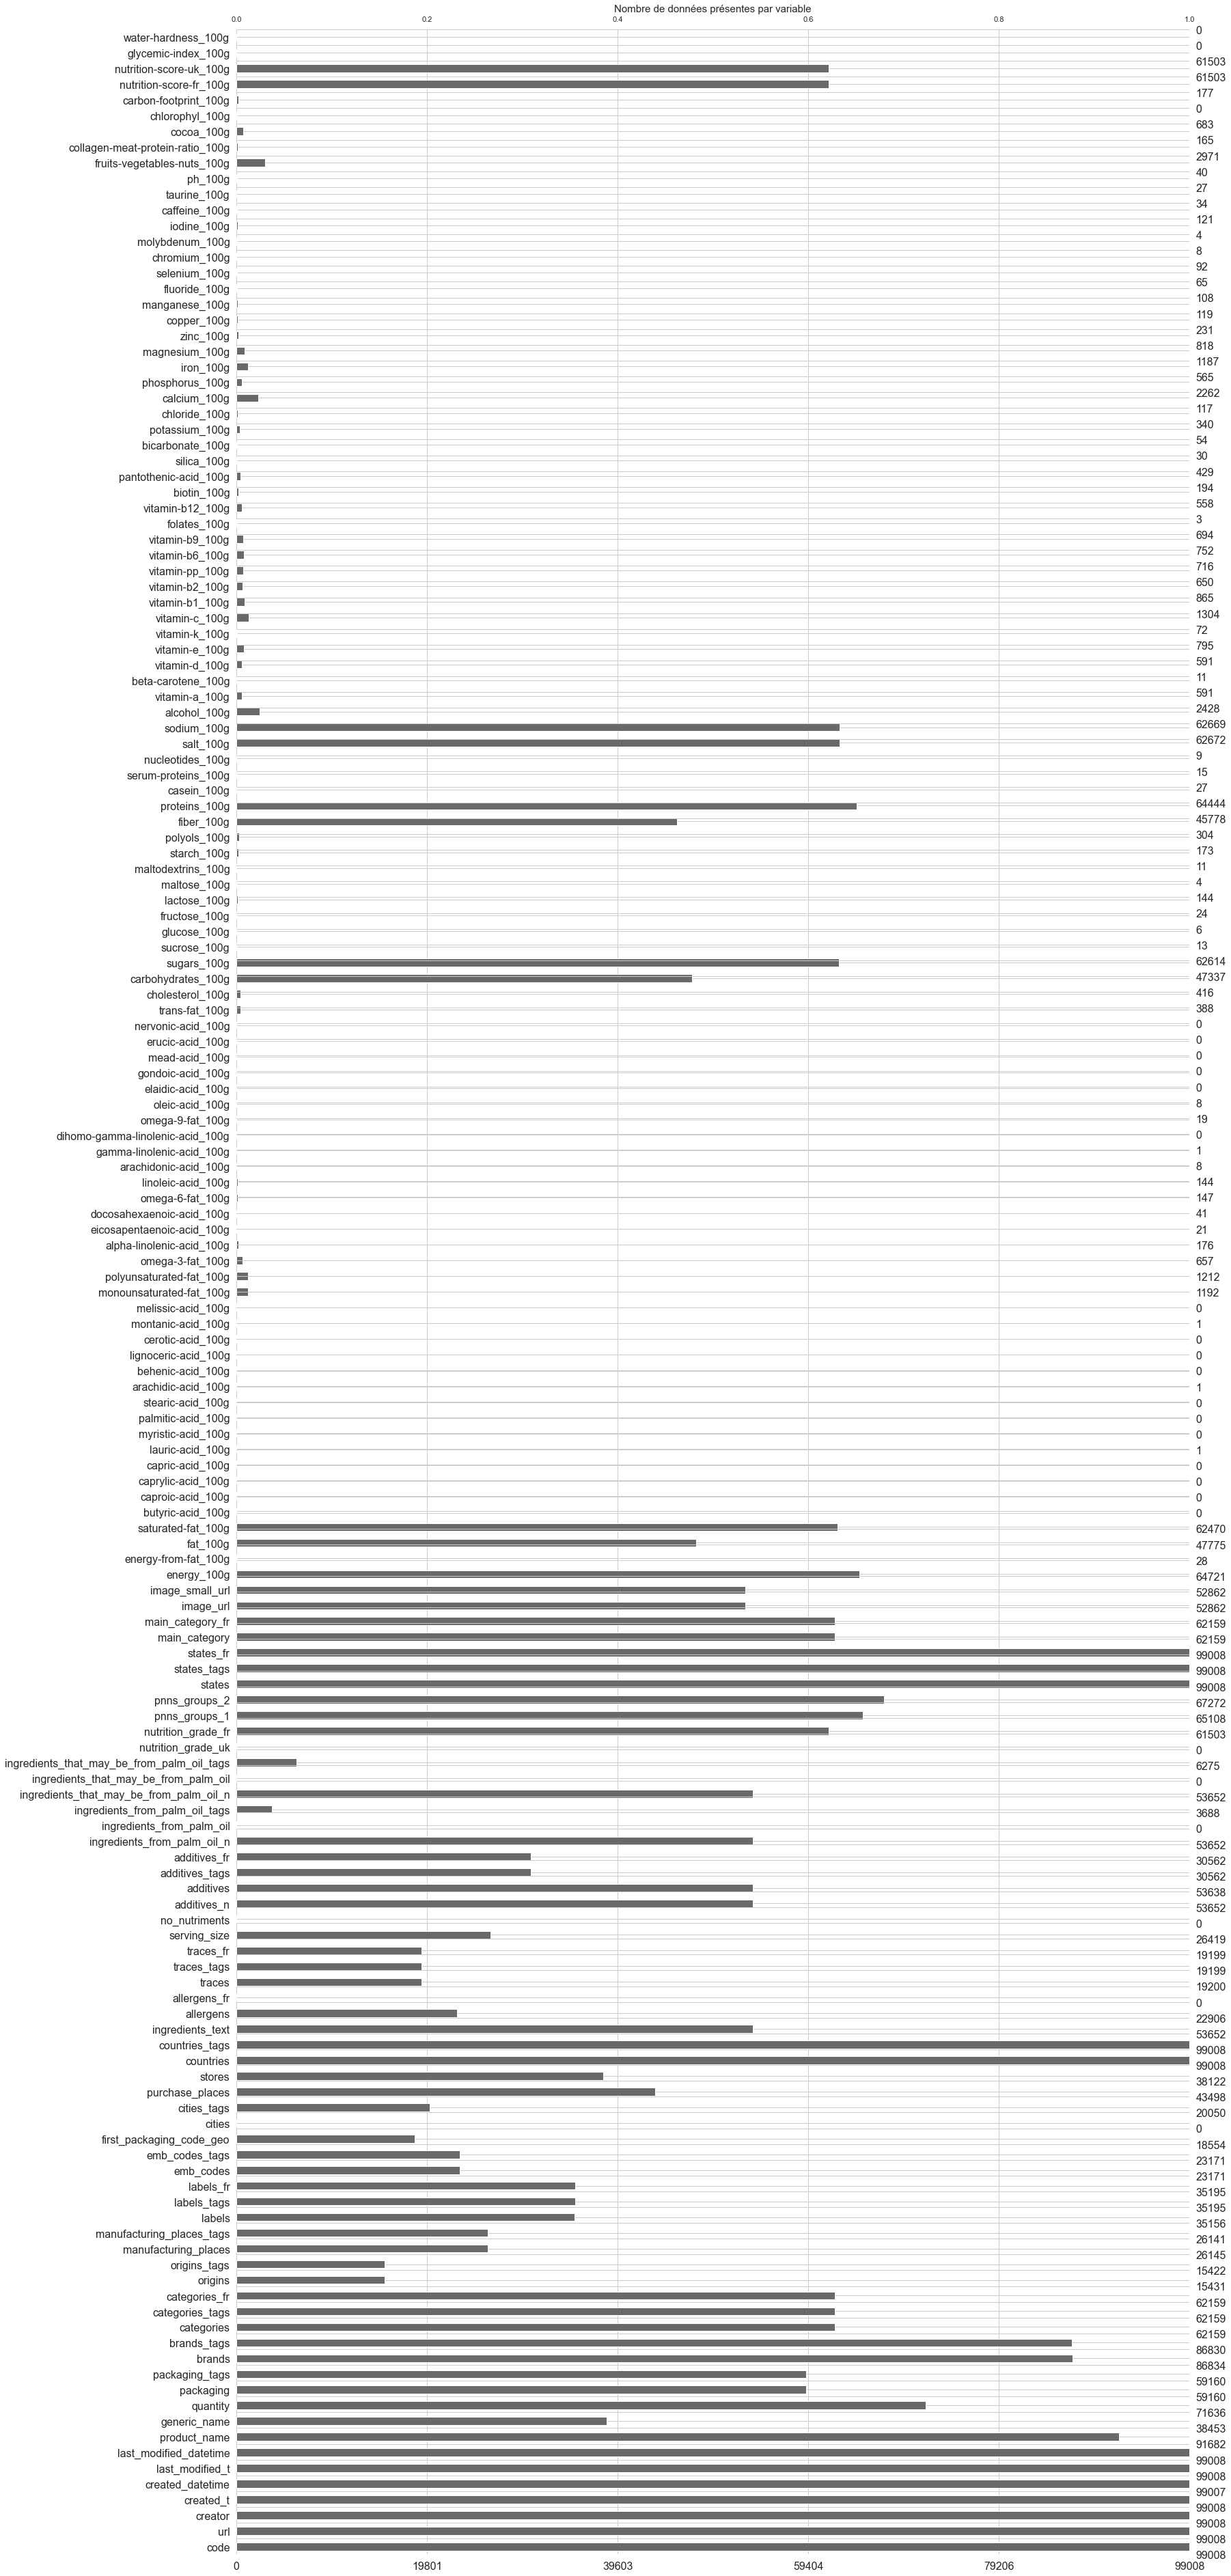

In [50]:
fc.bar_missing(data_filtered)

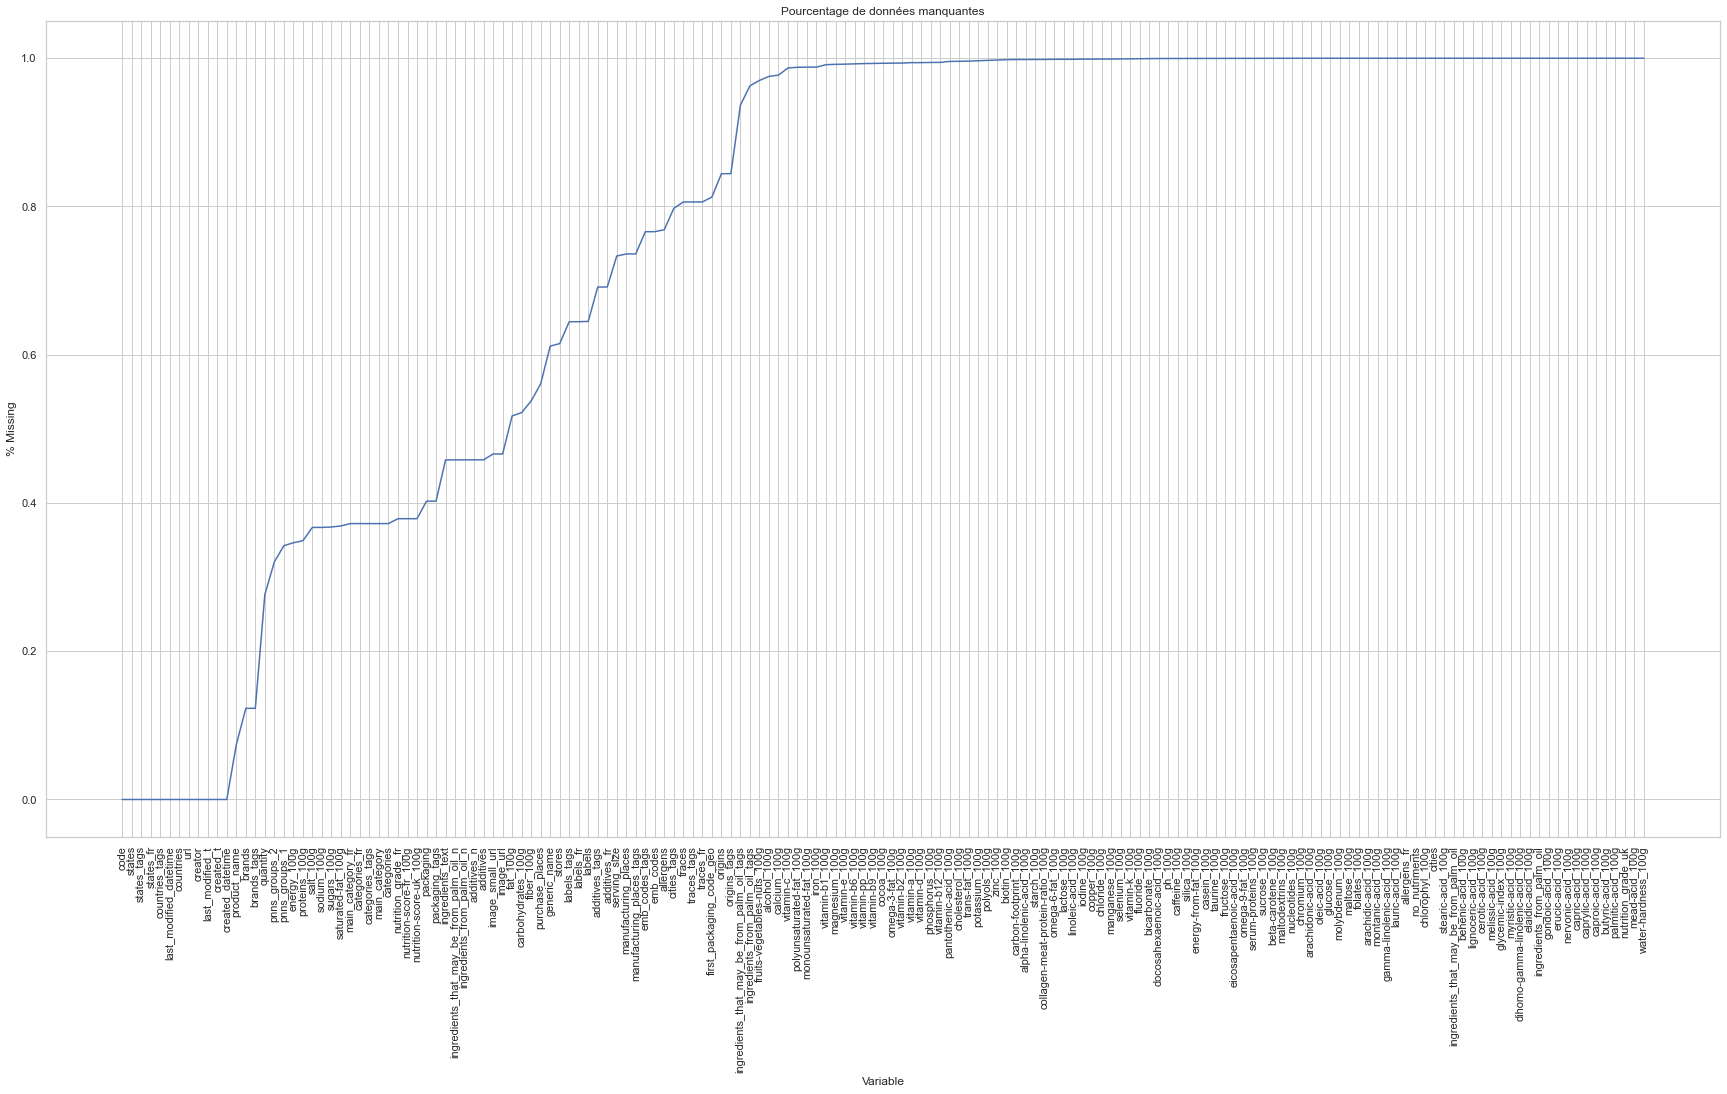

In [51]:
fc.graph_missing(data_filtered)

On constate qu'il y a une grande quantité de variables qui ne sont pas du tout complétées (pourcentage de données manquantes à 100%). 
Nous faisons donc le choix de supprimer toutes les variables qui ne sont pas remplies à plus de 15% (c'est-à-dire ayant un pourcentage de données manquantes supérieur ou égale à 85%).

In [52]:
data_filtered = fc.drop_columns_empty(data_filtered, 0.85)

Suppression de la variable cities avec % de valeurs manquantes 1.0
Suppression de la variable allergens_fr avec % de valeurs manquantes 1.0
Suppression de la variable no_nutriments avec % de valeurs manquantes 1.0
Suppression de la variable ingredients_from_palm_oil avec % de valeurs manquantes 1.0
Suppression de la variable ingredients_from_palm_oil_tags avec % de valeurs manquantes 0.96
Suppression de la variable ingredients_that_may_be_from_palm_oil avec % de valeurs manquantes 1.0
Suppression de la variable ingredients_that_may_be_from_palm_oil_tags avec % de valeurs manquantes 0.94
Suppression de la variable nutrition_grade_uk avec % de valeurs manquantes 1.0
Suppression de la variable energy-from-fat_100g avec % de valeurs manquantes 1.0
Suppression de la variable butyric-acid_100g avec % de valeurs manquantes 1.0
Suppression de la variable caproic-acid_100g avec % de valeurs manquantes 1.0
Suppression de la variable caprylic-acid_100g avec % de valeurs manquantes 1.0
Suppression

In [53]:
data_filtered.shape

(99008, 65)

Il nous reste 65 colonnes sur les 162 de départ. 

On constate que de nombreuses variables qui auraient pu être utiles pour notre application ont été supprimées car elles ne possédaient pas suffisamment de données renseignées. C'est le cas de nombreuses variables nutritionnelles.

In [54]:
fc.missing_general(data_filtered)

Nombre total de cellules manquantes : 2708238
Nombre de cellules manquantes en % : 42.08%


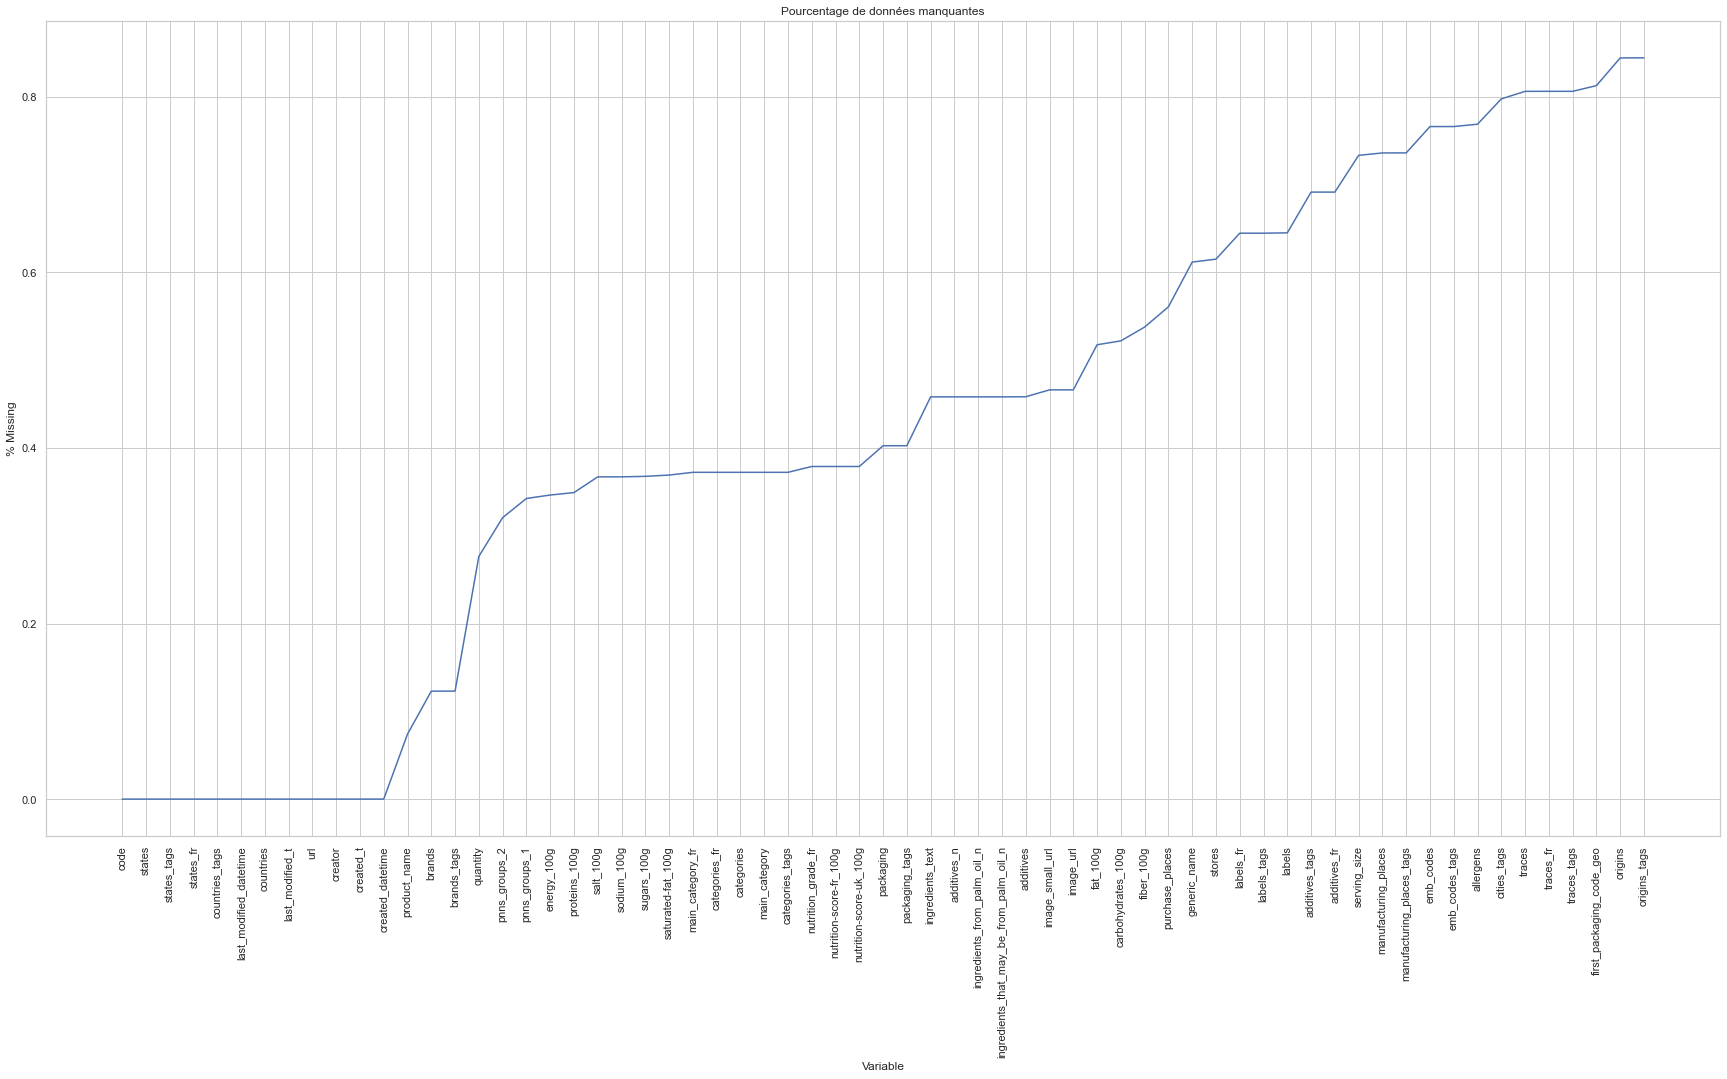

In [55]:
fc.graph_missing(data_filtered)

On observe donc une amélioration du taux de valeurs manquantes du data frame. En effet, il passe de 76.22% à 42.08%.

### <a id="6"></a> 4.2 Features

Nous allons désormais réaliser une sélection des variables pertinentes pour notre application. 

In [56]:
columns_keep = ['code', 'product_name', 'traces_fr', 'ingredients_from_palm_oil_n', 
                'nutrition_grade_fr','pnns_groups_1', 'pnns_groups_2',
                'energy_100g', 'fat_100g', 'saturated-fat_100g',
                'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
                'proteins_100g', 'salt_100g', 'sodium_100g', 
                'nutrition-score-fr_100g'
               ]

In [57]:
len(columns_keep)

17

In [59]:
data_filtered = data_filtered[columns_keep]

## <a id="7"></a> 5. Valeurs aberrantes

In [62]:
data_filtered.describe()

,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,53652.000000,6.472100e+04,47775.000000,62470.000000,47337.000000,62614.000000,45778.000000,64444.000000,62672.000000,62669.000000,61503.000000
mean,0.069690,1.170802e+03,13.320713,5.421440,27.748319,13.433867,2.558649,7.748859,1.159383,0.456470,8.681268
std,0.258332,1.282326e+04,16.928786,8.528936,27.407006,19.085515,4.633656,7.885380,4.306706,1.695535,9.046190
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,4.270000e+02,1.300000,0.300000,4.080000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000
50%,0.000000,1.034000e+03,6.800000,2.000000,14.500000,4.100000,1.350000,6.000000,0.558800,0.220000,9.000000
75%,0.000000,1.649000e+03,21.000000,7.400000,53.000000,17.800000,3.200000,10.900000,1.240000,0.488189,15.000000
max,2.000000,3.251373e+06,380.000000,210.000000,190.000000,105.000000,178.000000,100.000000,211.000000,83.000000,40.000000


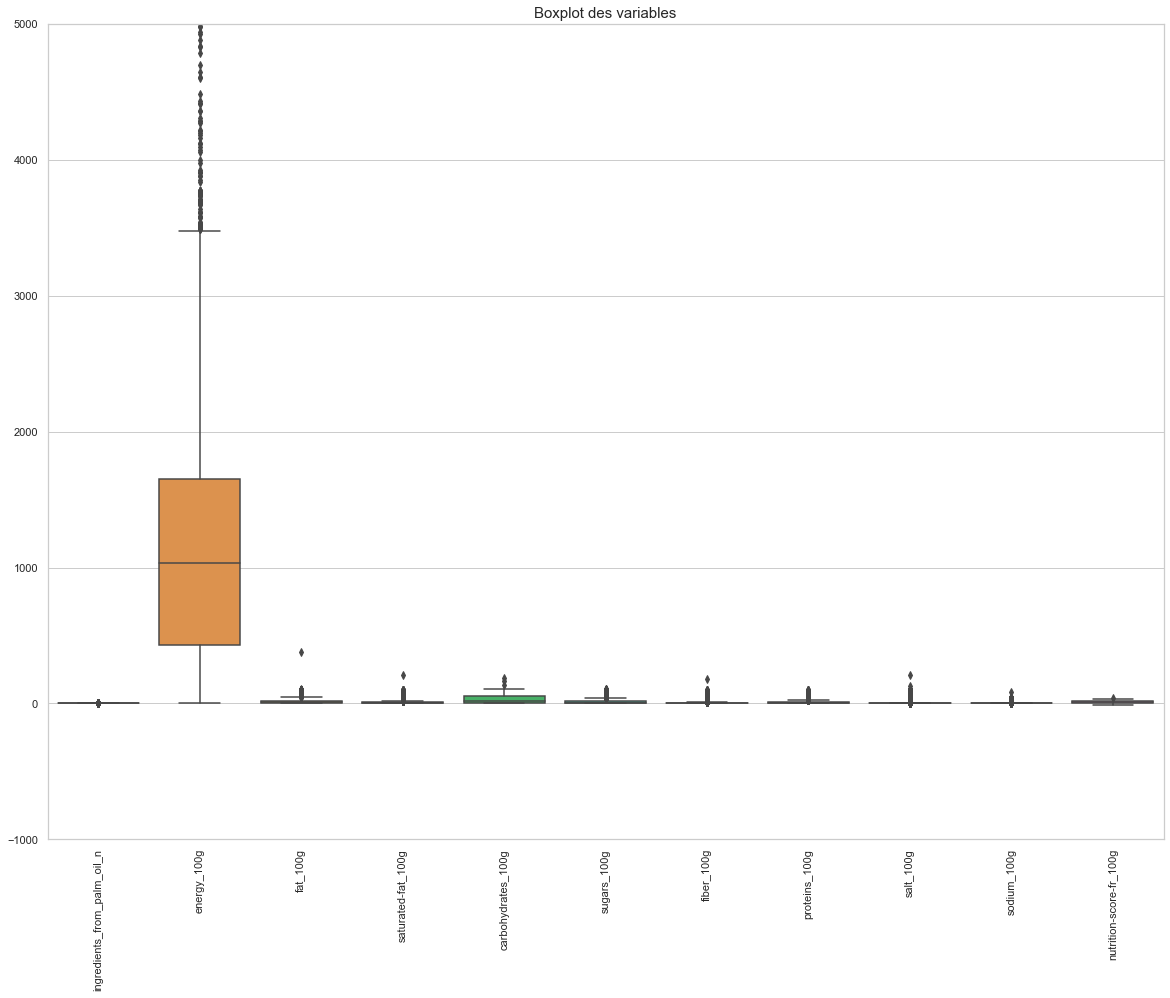

In [63]:
fc.boxplot(data_filtered,[-1e3,5e3])

In [64]:
colonnes_num = ['energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

col_val_nutri = ['fat_100g','saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
                 'fiber_100g','proteins_100g', 'salt_100g','sodium_100g']

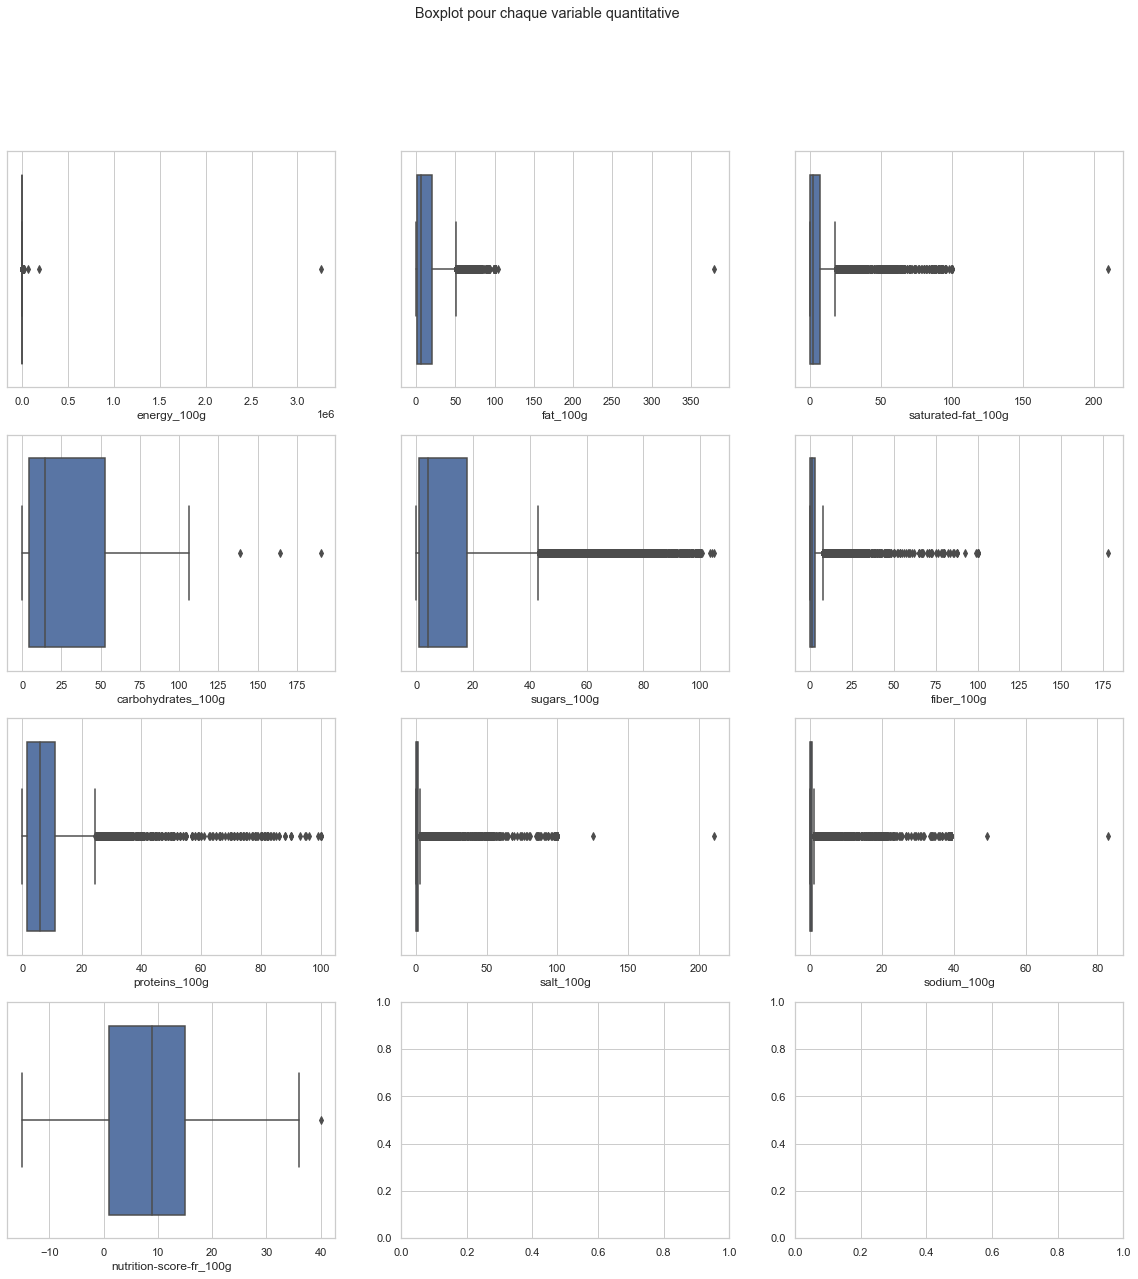

In [65]:
fc.multi_boxplot(data_filtered[colonnes_num])

On constate grâce au tableau fourni par *describe()* que certaines de nos variables semblent composées de valeurs aberrantes. 

Nous allons désormais nettoyer le jeu de données en identifiant les valeurs aberrantes. Ces valeurs seront remplacées par des NaN qui seront traités ultérieurement. 

Nous allons traiter les valeurs nutritionnelles. Ces valeurs sont représentées par un nom se terminant par *_100g*. Elles ne peuvent pas avoir de valeurs supérieures à 100 ou inférieures à 0. 

En ce qui concerne la variable *energy_100g*, au vu de l'ordre de grandeur, il est supposé ici qu'elle est exprimée en kJ. Elle ne peut pas être inférieure à 0 ni supérieure à 3700 kJ, ce qui correspond à 100g de lipides. En effet, les lipides représentent la valeur énergétique la plus importante avec 37 kJ/g. 

In [66]:
list_var_nettoyage = [
                ['energy_100g', 0, 3700],       # 3700 kJ correspondent à 100 g de lipides
                ['fat_100g', 0, 100],           # il y a au maximum 100 g de gras dans 100 g d'aliment
                ['saturated-fat_100g', 0, 100],
                ['carbohydrates_100g', 0, 100],            
                ['sugars_100g', 0, 100],        
                ['fiber_100g', 0, 100], 
                ['proteins_100g', 0, 100], 
                ['salt_100g', 0, 100], 
                ['sodium_100g', 0, 100],
                ['nutrition-score-fr_100g', -15, 40],  # Le nutriscore est compris entre -15 et 40
]

In [68]:
data_final = fc.nettoyage_100g(data_filtered,list_var_nettoyage)

energy_100g : Nombre de valeurs remplacées : 258 ; % de valeurs remplacées : 0.3986341372970133%.

fat_100g : Nombre de valeurs remplacées : 2 ; % de valeurs remplacées : 0.004186289900575615%.

saturated-fat_100g : Nombre de valeurs remplacées : 1 ; % de valeurs remplacées : 0.001600768368817032%.

carbohydrates_100g : Nombre de valeurs remplacées : 8 ; % de valeurs remplacées : 0.016900099288083316%.

sugars_100g : Nombre de valeurs remplacées : 5 ; % de valeurs remplacées : 0.007985434567349155%.

fiber_100g : Nombre de valeurs remplacées : 1 ; % de valeurs remplacées : 0.0021844554152649744%.

proteins_100g : Nombre de valeurs remplacées : 0 ; % de valeurs remplacées : 0.0%.

salt_100g : Nombre de valeurs remplacées : 2 ; % de valeurs remplacées : 0.0031912177687005365%.

sodium_100g : Nombre de valeurs remplacées : 0 ; % de valeurs remplacées : 0.0%.

nutrition-score-fr_100g : Nombre de valeurs remplacées : 0 ; % de valeurs remplacées : 0.0%.



In [69]:
data_filtered.isna().sum()

code                               0
product_name                    7326
traces_fr                      79809
ingredients_from_palm_oil_n    45356
nutrition_grade_fr             37505
pnns_groups_1                  33900
pnns_groups_2                  31736
energy_100g                    34287
fat_100g                       51233
saturated-fat_100g             36538
carbohydrates_100g             51671
sugars_100g                    36394
fiber_100g                     53230
proteins_100g                  34564
salt_100g                      36336
sodium_100g                    36339
nutrition-score-fr_100g        37505
dtype: int64

In [70]:
data_final.isna().sum()

code                               0
product_name                    7326
traces_fr                      79809
ingredients_from_palm_oil_n    45356
nutrition_grade_fr             37505
pnns_groups_1                  33900
pnns_groups_2                  31736
energy_100g                    34545
fat_100g                       51235
saturated-fat_100g             36539
carbohydrates_100g             51679
sugars_100g                    36399
fiber_100g                     53231
proteins_100g                  34564
salt_100g                      36338
sodium_100g                    36339
nutrition-score-fr_100g        37505
dtype: int64

Comme attendu, il y a désormais plus de valeur NaN dans le nouveau dataframe *data_final*.

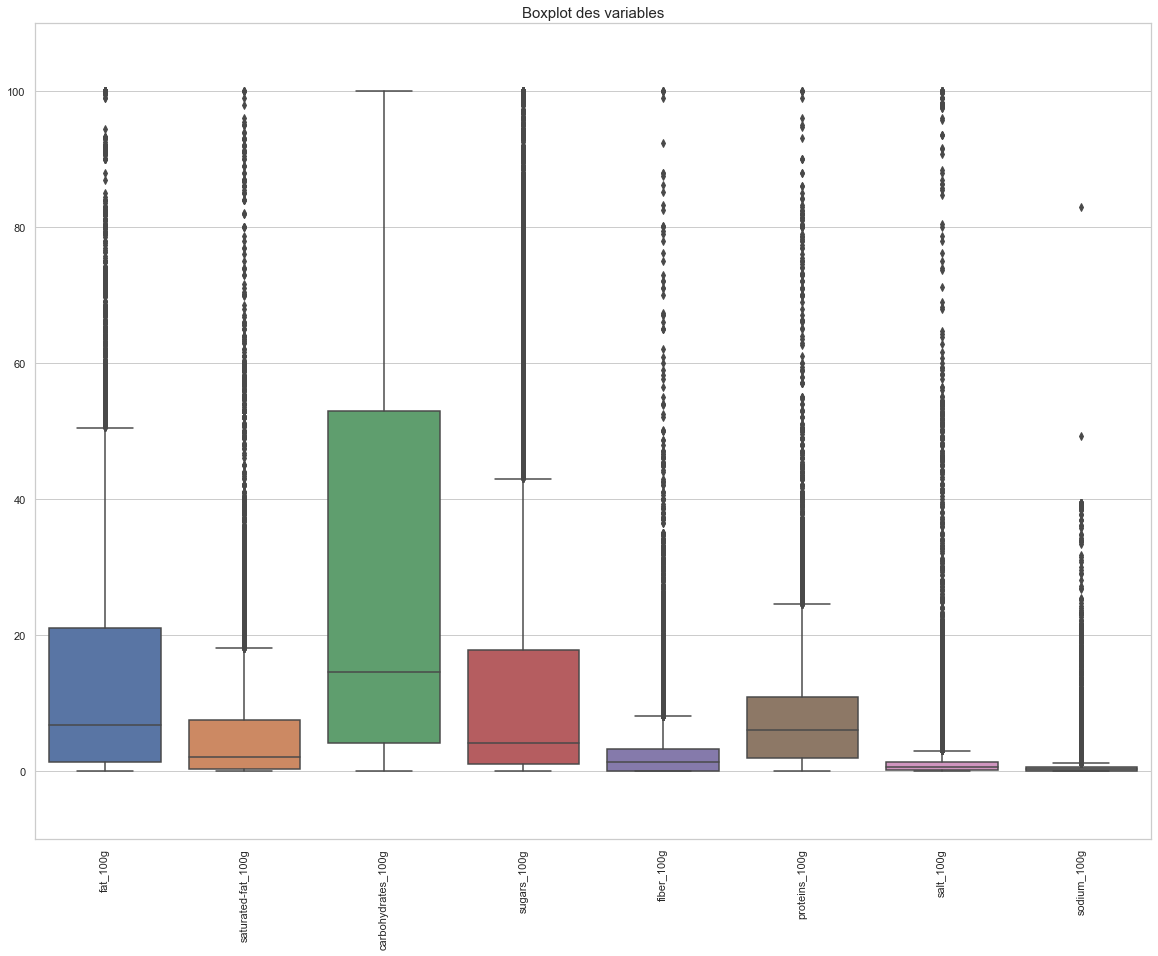

In [72]:
fc.boxplot(data_final[col_val_nutri],[-10,110])

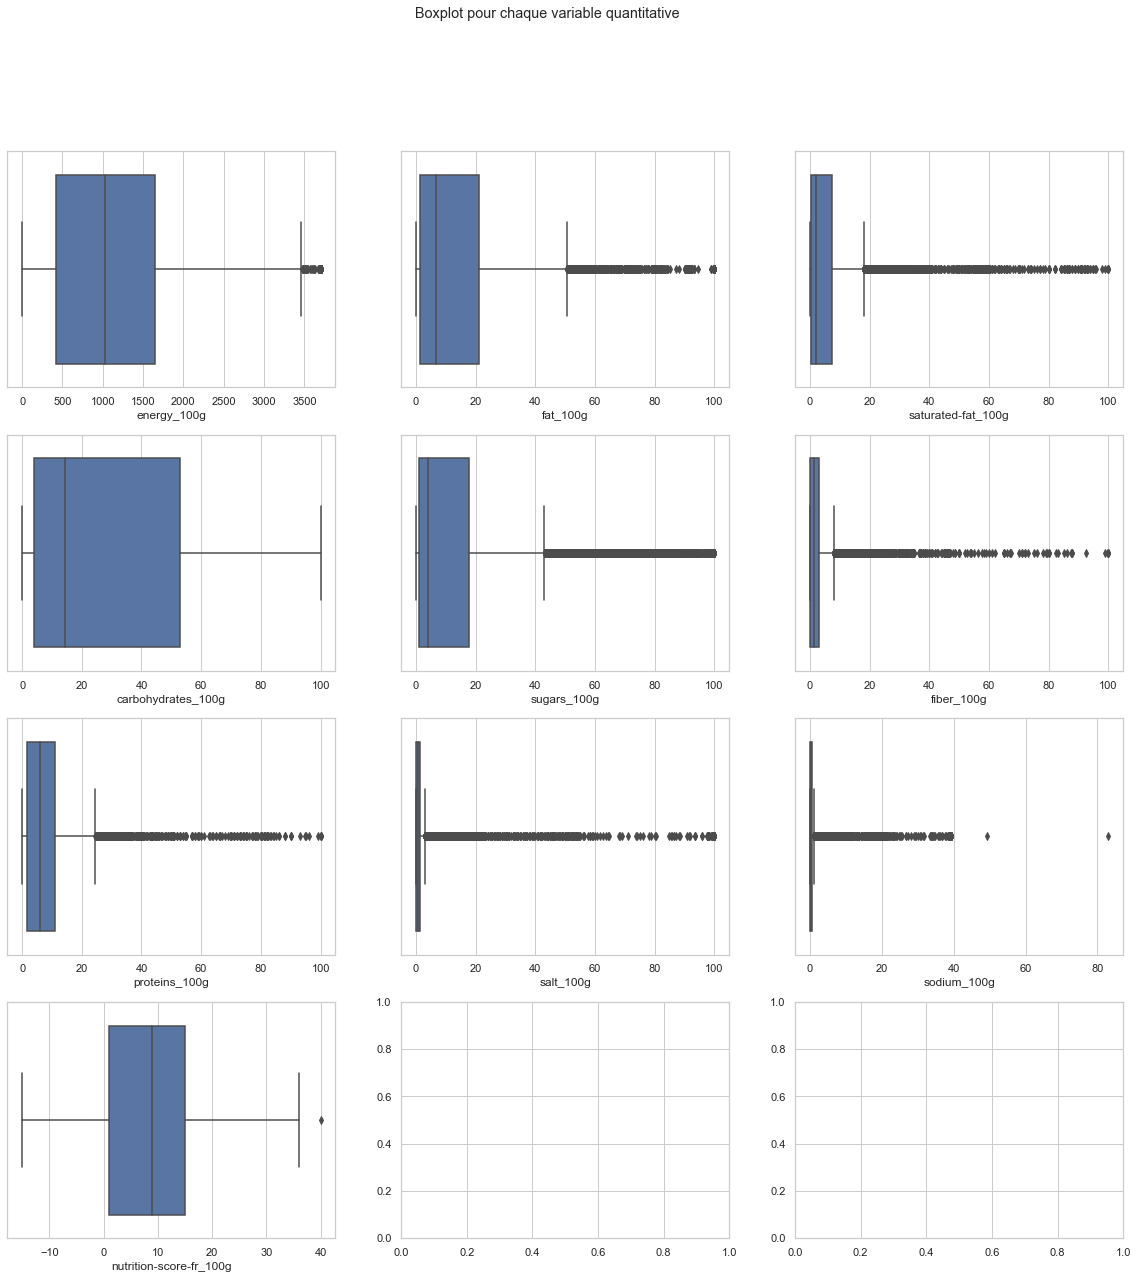

In [73]:
fc.multi_boxplot(data_final[colonnes_num])

In [74]:
index_inco_fat = fc.incoherences(data_final,['fat_100g','saturated-fat_100g']).index

(89, 17)


In [75]:
index_inco_sucre = fc.incoherences(data_final,['carbohydrates_100g','sugars_100g']).index

(99, 17)


In [76]:
index_inco_salt = fc.incoherences(data_final,['salt_100g','sodium_100g']).index

(0, 17)


Pour chacune de ces incohérences, nous allons transformer l'une des deux valeurs en NaN afin que ces dernières soient modifiées par la suite lors de l'imputation de la feature. 

In [77]:
fc.transformation_NaN(data_final,index_inco_fat,'saturated-fat_100g')

Transformation effectuée sur: 89 observations


In [78]:
fc.transformation_NaN(data_final,index_inco_sucre,'sugars_100g')

Transformation effectuée sur: 99 observations


Nous allons déterminer si certaines observations sont incohérentes en déterminant si la somme de leurs valeurs nutritionnelles est supérieure à 100g. 
Un produit est composé de différentes catégories:
- les matières grasses (ou lipides) : dont le gras non saturé, le gras saturé et le gars transformé
- les glucides : dont le sucre et les fibres
- les protéines
- le sel
- les vitamines et minéraux

In [79]:
index_inco_somme = fc.incoherence_somme(data_final).index

(118, 17)


In [81]:
fc.drop_lignes(data_final,index_inco_somme)

Suppression effectuée


In [82]:
data_final.shape

(98890, 17)

## <a id="8"></a> 6. Valeurs manquantes

### <a id="9"></a> 6.1 Premières observations

Nous avons nettoyé notre jeu de données en transformant les données aberrantes en NaN. 

Nous allons désormais traiter ces valeurs manquantes.

Regardons tout d'abord les valeurs manquantes après le nettoyage. 

In [83]:
fc.missing_general(data_final)

Nombre total de cellules manquantes : 644020
Nombre de cellules manquantes en % : 38.31%


In [84]:
fc.valeurs_manquantes(data_final).sort_values(by='Missing (%)')

,Variable,Missing values,Missing (%)
0,code,0,0.000000
1,product_name,7326,0.074082
6,pnns_groups_2,31731,0.320872
5,pnns_groups_1,33895,0.342755
7,energy_100g,34539,0.349267
13,proteins_100g,34564,0.349520
14,salt_100g,36338,0.367459
15,sodium_100g,36339,0.367469
11,sugars_100g,36497,0.369067
9,saturated-fat_100g,36625,0.370361


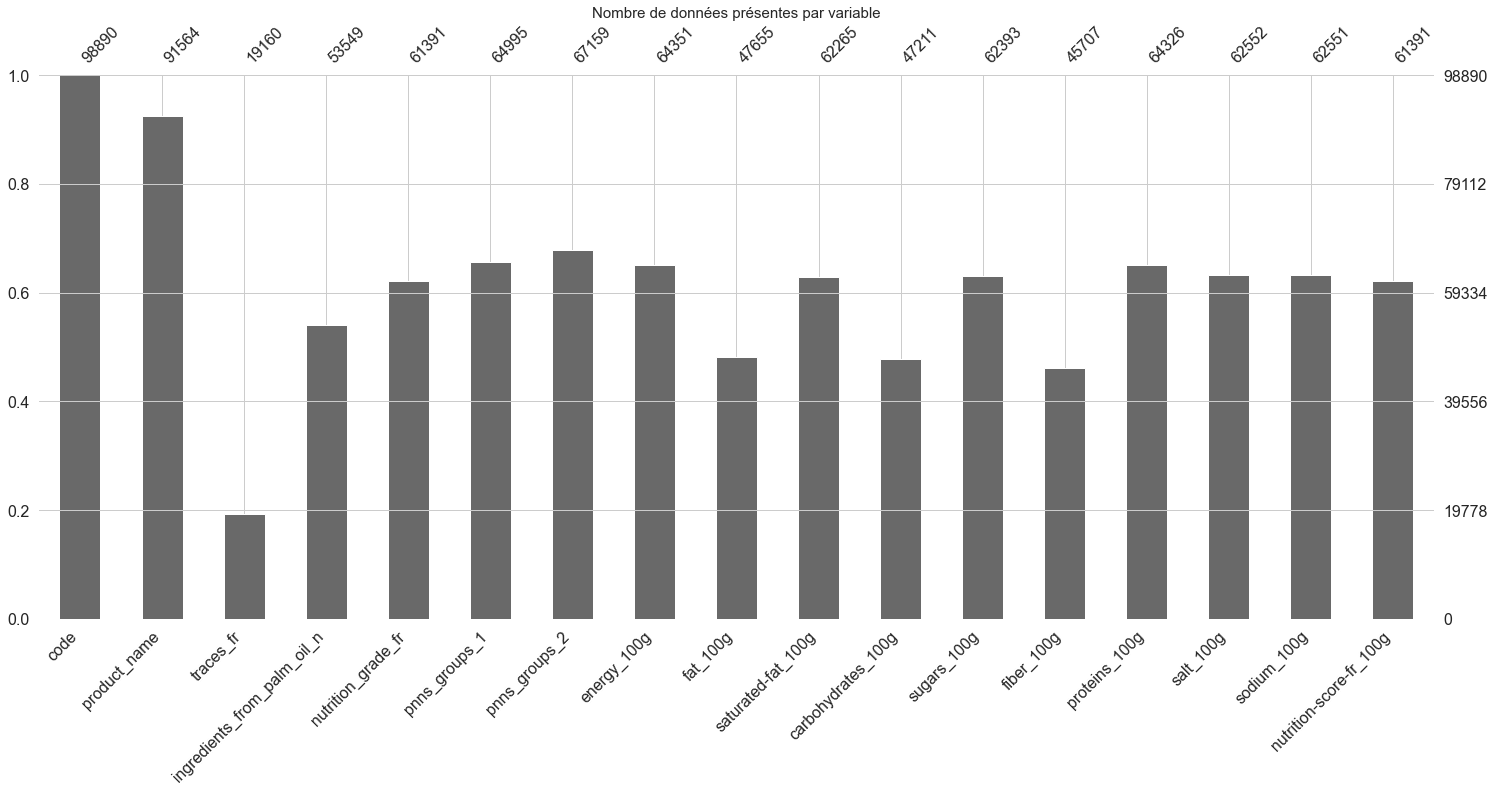

In [85]:
fc.bar_missing(data_final)

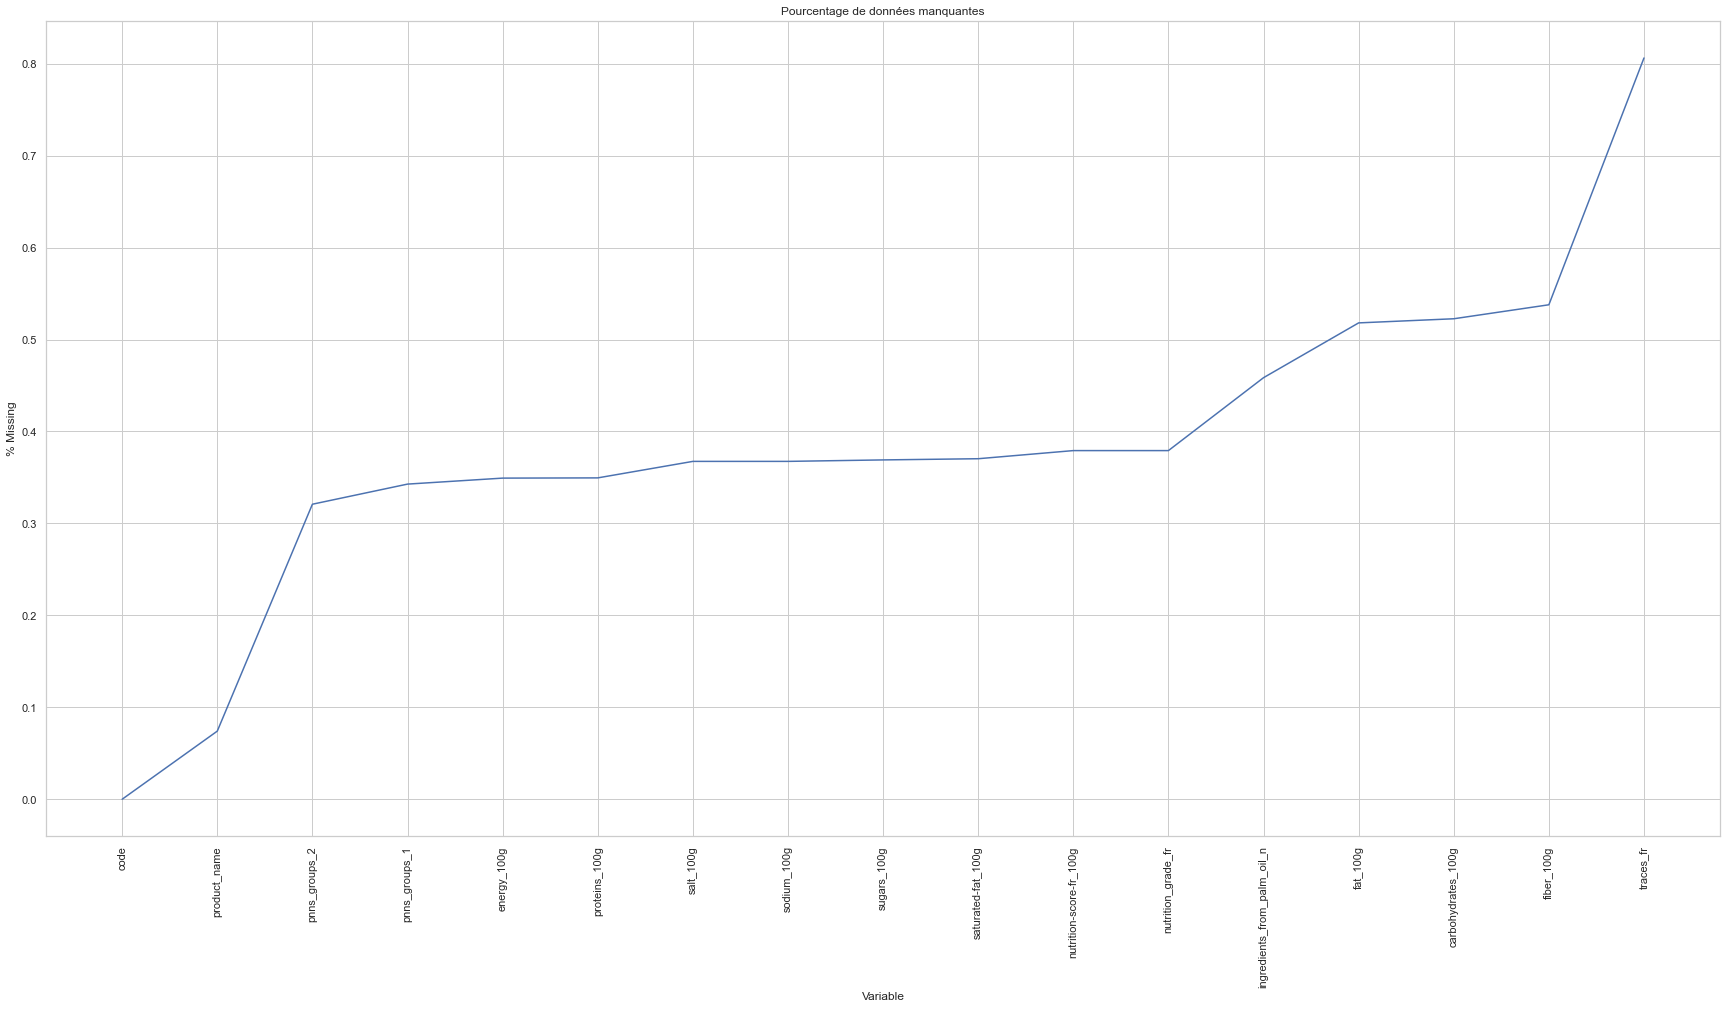

In [86]:
fc.graph_missing(data_final)

In [87]:
index_vn_absentes = fc.val_nutri_absentes(data_final)

Nombre d'observations ayant toutes les variables nutritionnelles absentes:  33652


On supprime les lignes ne possédant aucune valeur nutritionnelle. En effet, ces lignes ne sont pas exploitables car elles ne sont pas suffisamment complétées avec les variables nécessaires à notre application. Imputer l'intégralité des variables d'un produit créerait une erreur trop importante.

In [89]:
fc.drop_lignes(data_final,index_vn_absentes)

Suppression effectuée


In [90]:
data_final = data_final.reset_index(drop=True)

In [91]:
data_final.shape

(65238, 17)

In [92]:
data_final.describe()

,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,44361.000000,64351.000000,47655.000000,62265.000000,47211.000000,62393.000000,45707.000000,64326.000000,62552.000000,62551.000000,61310.000000
mean,0.078244,1102.223469,13.257138,5.405436,27.655338,13.394736,2.553614,7.748874,1.147925,0.454059,8.680868
std,0.272558,761.346416,16.734052,8.448919,27.314615,19.010744,4.561284,7.874704,4.160179,1.682142,9.045915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,423.000000,1.300000,0.300000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000
50%,0.000000,1029.000000,6.800000,1.930000,14.500000,4.100000,1.330000,6.000000,0.558800,0.220000,9.000000
75%,0.000000,1640.000000,21.000000,7.400000,53.000000,17.600000,3.200000,10.900000,1.240000,0.488189,15.000000
max,2.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,40.000000


In [93]:
print('Il reste {:.2%} du data frame initial.'.format(data_final.shape[0]/data.shape[0]))

Il reste 20.35% du data frame initial.


### <a id="10"></a> 6.2 Traitement des colonnes de valeurs nutritionnelles

Nous allons procéder à l'imputation des colonnes nutritionnelles. 

#### <a id="11"></a> 6.2.a Traitement de fiber_100g

On choisit d'imputer à cette variable la valeur 0. En effet, on considère que la plupart des aliments ne comportent pas de fibres. Sur la déclaration nutritionnelle (tableau des valeurs nutritionnelles obligatoirement présent sur l'étiquette de la plupart des produits), la variable associée aux fibres est optionnelle. Les produits dont la quantité de fibres n'est pas renseignée sur l'étiquette possèdent donc dans le dataframe la valeur NaN, et non pas une valeur de 0g synonyme d'absence.

In [94]:
data_final = fc.imput_simple(data_final,['fiber_100g'],'constant',0)

Valeurs avec lesquelles ont été complétées la ou les colonnes:
[0.]


#### <a id="12"></a> 6.2.b Traitement de fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, salt_100g, sodium_100g

Ces variables sont deux à deux correlées. L'une peut être prédite à travers l'autre. En effet, *fat_100g* est composée en partie de *saturated-fat_100g*, de même *carbohydrates_100g* est composée en partie de *sugars_100g*, et *salt_100g* de *sodium_100g*. Pour ces variables nous allons donc utiliser un Iterative Imputer.

In [95]:
data_final[['fat_100g','saturated-fat_100g']] = fc.iterative_imput(data_final[['fat_100g','saturated-fat_100g']],0,100)

In [96]:
data_final[['carbohydrates_100g', 'sugars_100g']] = fc.iterative_imput(data_final[['carbohydrates_100g', 'sugars_100g']],0,100)

In [97]:
data_final[['salt_100g', 'sodium_100g']] = fc.iterative_imput(data_final[['salt_100g', 'sodium_100g']],0,100)

In [98]:
data_final.isna().sum()

code                               0
product_name                     380
traces_fr                      48044
ingredients_from_palm_oil_n    20877
nutrition_grade_fr              3928
pnns_groups_1                  14277
pnns_groups_2                  14140
energy_100g                      887
fat_100g                           0
saturated-fat_100g                 0
carbohydrates_100g                 0
sugars_100g                        0
fiber_100g                         0
proteins_100g                    912
salt_100g                          0
sodium_100g                        0
nutrition-score-fr_100g         3928
dtype: int64

#### <a id="13"></a> 6.2.c Traitement de proteins_100g.

Cette variable sera complétée grâce à un *KNNImputer*.

In [99]:
data_final[col_val_nutri] = fc.knn_imputer(data_final[col_val_nutri])

#### <a id="14"></a> 6.2.d Traitement de la colonne energy_100g

Nous allons désormais calculer les valeurs manquantes de la colonne *energy_100g* grâce aux valeurs nutritionnelles.

La variable *energy_100g* correspond à l'énergie (en kJ) pour 100g du produit correspondant. Elle dépend de sa composition en lipides, glucides, protéines et fibres. Puisque nous disposons maintenant de ces données complétées, nous allons pouvoir également compléter la variable *energy_100g*.

Les différents coefficients sont présentés à l'annexe XIV : Coefficients de conversion pour le calcul de l'énergie (https://www.senat.fr/europe/textes_europeens/ue0120.pdf).

In [106]:
data_final['calcul_energy'] = fc.calcul_energie(data_final,col_val_nutri)

In [107]:
fc.remplacement_colonnes(data_final,['energy_100g','calcul_energy'])

In [108]:
data_final['energy_100g'].isna().sum()

0

In [109]:
data_final.drop('calcul_energy',axis=1,inplace=True)

**Vérification des boxplot et distributions des variables nutritionnelles.**

In [110]:
data_final = data_final.round(2)

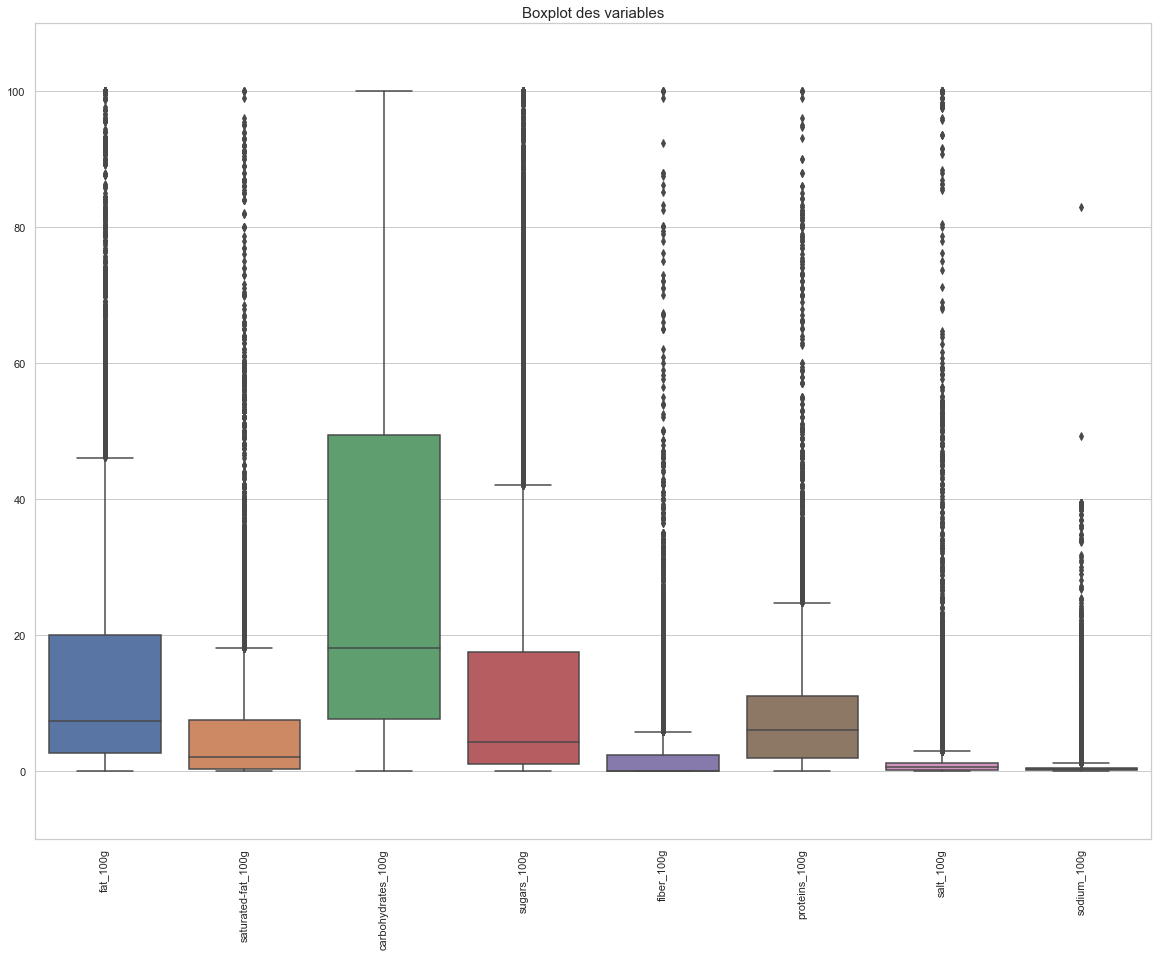

In [111]:
fc.boxplot(data_final[col_val_nutri],[-10,110])

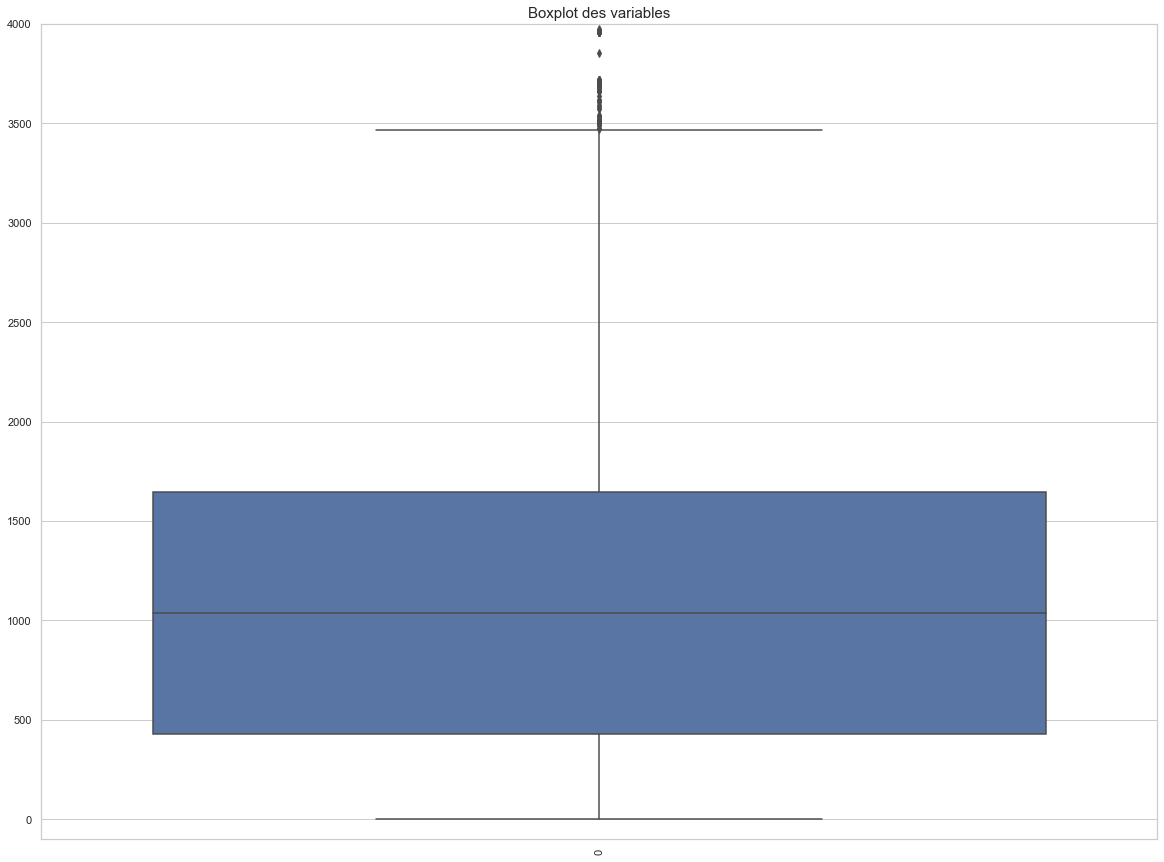

In [112]:
fc.boxplot(data_final['energy_100g'],[-1e2,4e3])

Nous supprimons toutes les observations présentant des incohérences ou des valeurs aberrantes après le remplissage.

In [113]:
inco_somme = fc.incoherence_somme(data_final).index

(1300, 17)


In [114]:
fc.incoherences(data_final,['fat_100g','saturated-fat_100g']).index

(0, 17)


Int64Index([], dtype='int64')

In [115]:
fc.incoherences(data_final,['carbohydrates_100g','sugars_100g'])

(0, 17)


,code,product_name,traces_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


In [116]:
fc.incoherences(data_final,['salt_100g','sodium_100g'])

(0, 17)


,code,product_name,traces_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


In [117]:
fc.drop_lignes(data_final,inco_somme)

Suppression effectuée


In [118]:
data_final.describe()

,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,44190.000000,63938.000000,63938.000000,63938.000000,63938.000000,63938.000000,63938.000000,63938.000000,63938.000000,63938.000000,60113.000000
mean,0.078344,1089.793540,12.836387,5.052368,27.566401,12.679010,1.772112,7.741656,1.097402,0.432140,8.449038
std,0.272644,751.802135,14.999526,7.443632,24.927910,17.828637,3.800728,7.546558,3.495678,1.381164,8.929550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,421.000000,2.500000,0.300000,7.200000,1.000000,0.000000,1.900000,0.090000,0.040000,1.000000
50%,0.000000,1021.000000,7.100000,1.900000,17.870000,4.000000,0.000000,6.000000,0.620000,0.240000,8.000000
75%,0.000000,1625.000000,19.020000,7.000000,48.000000,16.000000,2.300000,11.000000,1.200000,0.470000,15.000000
max,2.000000,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,100.000000,49.210000,40.000000


In [119]:
data_final = data_final.reset_index(drop=True)

In [120]:
data_final.shape

(63938, 17)

In [121]:
print('Il reste {:.2%} du data frame initial.'.format(data_final.shape[0]/data.shape[0]))

Il reste 19.94% du data frame initial.


### <a id="15"></a> 6.3 Traitement du nutriscore

In [123]:
nutriscore_knn = fc.knn_imputer(data_final[colonnes_num])

On choisit d'imputer cette variable à l'aide d'un KNNImputer car on fait le choix de la compléter en fonction de ses 5 plus proches voisins. Ainsi, les valeurs des nutriscores seront similaires pour les produits présentant les mêmes apports nutritionnels. 

In [124]:
data_final['nutrition-score-fr_100g'] = nutriscore_knn['nutrition-score-fr_100g']

### <a id="16"></a> 6.4 Traitement du nutrigrade

Le nutrigrade est basé sur une échelle de 5 lettres et couleurs allant de A à E (et du vert foncé au orange foncé) pour optimiser son accessibilité et sa compréhension par le consommateur.

Il est déterminé à partir du nutriscore. Selon l'intervalle dans lequel se situe le nutriscore, une lettre et une couleur est attribuée. 

Nous allons donc compléter cette variable à l'aide du nutriscore. 

In [125]:
fc.nutrigrade(data_final)
data_final[['nutrition_grade_fr','nutri_calcul']].head()

,nutrition_grade_fr,nutri_calcul
0,e,e
1,NaN,c
2,d,d
3,e,d
4,d,d


In [127]:
fc.remplacement_colonnes(data_final,['nutrition_grade_fr','nutri_calcul'])

In [129]:
data_final.drop('nutri_calcul',axis=1,inplace=True)

### <a id="17"></a> 6.5 Traitement de la variable catégorie

In [130]:
data_final[['product_name','pnns_groups_1','pnns_groups_2']].head()

,product_name,pnns_groups_1,pnns_groups_2
0,Lion Peanut x2,unknown,unknown
1,Pack de 2 Twix,unknown,unknown
2,Praliné Amande Et Noisette,NaN,NaN
3,"Pepsi, Nouveau goût !",Beverages,Sweetened beverages
4,Tarte Poireaux Et Lardons,NaN,NaN


In [134]:
data_final['pnns_groups_1'].isna().sum()

13308

In [135]:
data_final['pnns_groups_2'].isna().sum()

13171

In [133]:
data_final['pnns_groups_1'] = data_final['pnns_groups_1'].str.replace('-',' ').str.lower()
data_final['pnns_groups_2'] = data_final['pnns_groups_2'].str.lower()

Nous avons 2 variables représentant la catégorie et la sous-catégorie des produits. Ces variables sont relativement peu complétées. Imputer les valeurs manquantes pourrait créer un taux d'erreur trop important et classer des produits dans des catégories auxquels ils n'appartiennent pas. 

Vis-à-vis de notre application, cela reviendrait à conseiller à nos clients des produits n'ayant aucun rapport avec leur recherche afin de remplacer le leur. Ce n'est pas ce que nous recherchons. 

Les variables étant trop peu renseignées (et les autres variables de catégorie alimentaire non exploitables car non standardisées), cela créé un premier point problématique au vu du développement de cette application.

Ici, nous décidons de remplacer les valeurs manquantes par la catégorie alimentaire *'unknown'* déjà existante.

In [136]:
fc.imput_simple(data_final,['pnns_groups_1'],'constant','unknown')

Valeurs avec lesquelles ont été complétées la ou les colonnes:
['unknown']


,code,product_name,traces_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,36252,Lion Peanut x2,NaN,0.0,e,unknown,unknown,1883.0,20.00,12.50,70.00,57.50,2.5,2.50,0.10,0.04,22.0
1,39529,Pack de 2 Twix,NaN,NaN,c,unknown,unknown,1481.0,4.17,1.51,77.08,39.42,6.2,6.25,1.16,0.46,9.2
2,10207260,Praliné Amande Et Noisette,NaN,NaN,d,unknown,NaN,2406.0,9.47,2.90,64.49,50.30,3.9,9.50,0.00,0.00,14.0
3,40608754,"Pepsi, Nouveau goût !",NaN,0.0,e,beverages,sweetened beverages,177.0,0.00,0.00,10.40,10.40,0.0,0.00,0.03,0.01,13.0
4,69161025,Tarte Poireaux Et Lardons,NaN,NaN,d,unknown,NaN,1079.0,22.37,11.00,16.11,1.00,1.4,7.50,0.80,0.31,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63933,9782211109758,Verrine Cheescake Myrtille,NaN,NaN,d,unknown,NaN,1084.0,23.96,12.00,25.43,10.50,0.0,8.70,0.29,0.11,16.0
63934,9782401029101,Fiche Brevet,NaN,NaN,b,unknown,NaN,4.0,6.44,1.00,16.11,1.00,10.0,10.00,10.00,3.94,0.0
63935,9847548283004,Tartines craquantes bio au sarrasin,NaN,NaN,a,cereals and potatoes,bread,1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.68,0.27,-4.0
63936,9900000000233,Amandes,NaN,NaN,b,unknown,NaN,2406.0,10.79,3.73,18.94,3.89,12.2,21.22,0.10,0.04,0.0


In [137]:
fc.imput_simple(data_final,['pnns_groups_2'],'constant','unknown')

Valeurs avec lesquelles ont été complétées la ou les colonnes:
['unknown']


,code,product_name,traces_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,36252,Lion Peanut x2,NaN,0.0,e,unknown,unknown,1883.0,20.00,12.50,70.00,57.50,2.5,2.50,0.10,0.04,22.0
1,39529,Pack de 2 Twix,NaN,NaN,c,unknown,unknown,1481.0,4.17,1.51,77.08,39.42,6.2,6.25,1.16,0.46,9.2
2,10207260,Praliné Amande Et Noisette,NaN,NaN,d,unknown,unknown,2406.0,9.47,2.90,64.49,50.30,3.9,9.50,0.00,0.00,14.0
3,40608754,"Pepsi, Nouveau goût !",NaN,0.0,e,beverages,sweetened beverages,177.0,0.00,0.00,10.40,10.40,0.0,0.00,0.03,0.01,13.0
4,69161025,Tarte Poireaux Et Lardons,NaN,NaN,d,unknown,unknown,1079.0,22.37,11.00,16.11,1.00,1.4,7.50,0.80,0.31,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63933,9782211109758,Verrine Cheescake Myrtille,NaN,NaN,d,unknown,unknown,1084.0,23.96,12.00,25.43,10.50,0.0,8.70,0.29,0.11,16.0
63934,9782401029101,Fiche Brevet,NaN,NaN,b,unknown,unknown,4.0,6.44,1.00,16.11,1.00,10.0,10.00,10.00,3.94,0.0
63935,9847548283004,Tartines craquantes bio au sarrasin,NaN,NaN,a,cereals and potatoes,bread,1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.68,0.27,-4.0
63936,9900000000233,Amandes,NaN,NaN,b,unknown,unknown,2406.0,10.79,3.73,18.94,3.89,12.2,21.22,0.10,0.04,0.0


In [138]:
data_final[['pnns_groups_1','pnns_groups_2']].isna().sum()

pnns_groups_1    0
pnns_groups_2    0
dtype: int64

### <a id="18"></a> 6.6 Traitement de *traces_fr*

Les colonnes de traces et allergènes ne sont que peu complétées et comportent énormément de valeurs différentes qui ne sont pas standardisées. La colonne *traces_fr*, par rapport aux autres colonnes restantes lors du choix des features, semble la plus exploitable. Il y a plusieurs centaines de variables existantes. Nous allons donc garder les 15 traces avec le plus d'occurrences. Les autres seront indiquées comme *'aucune'*.

Nettoyage effectué


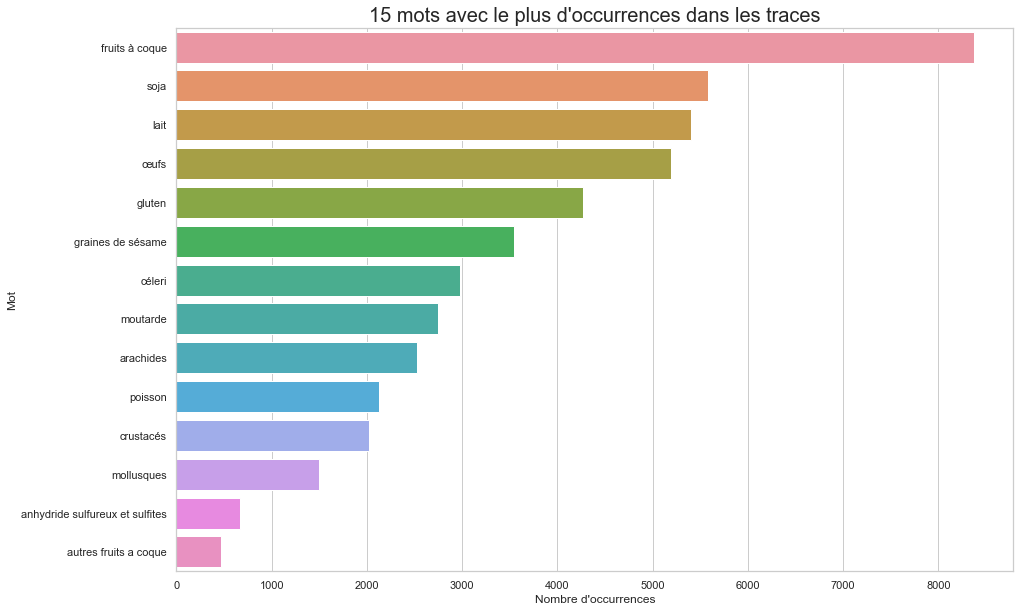

In [140]:
df_traces = fc.occurrences_traces(data_final,'traces_fr',15)

In [141]:
fc.nettoyage_string(data_final,'traces_fr')

Nettoyage effectué


In [143]:
data_final = fc.filtre_traces(data_final,'traces_fr',df_traces)

On remplace désormais les valeurs manquante par *aucune*.

In [144]:
data_final['traces'] = data_final['traces'].fillna('aucune')

On peut désormais supprimer la colonne *traces_fr* qui ne nous est plus utile.

In [145]:
data_final.drop('traces_fr', axis=1, inplace=True)

### <a id="19"></a> 6.7 Traitement de *ingredients_from_palm_oil_n*

Cette variable nous informe du nombre d'ingrédient provenant d'huile de palme pour chaque produit. Nous allons exploiter cette variable pour en créer une indiquant si le produit contient ou non au moins un ingrédient provenant de l'huile de palme. Dans le cadre de notre application, cela permettra de pouvoir proposer un régime alimentaire sans huile de palme. 

Commençons par imputer la variable *ingredients_from_palm_oil_n* à l'aide d'un KNNImputer.

In [146]:
col_num = data_final.select_dtypes(include=['int64','float64']).columns
col_num

Index(['ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [147]:
data_final[col_num] = fc.knn_imputer(data_final[col_num])

In [148]:
data_final['palm_oil'] = data_final['ingredients_from_palm_oil_n'].apply(lambda x: 1 if x>0 else 0).astype('category')

On peut désormais supprimer la colonne *ingredients_from_palm_oil_n* qui ne nous est plus utile.

In [149]:
data_final.drop('ingredients_from_palm_oil_n', axis=1, inplace=True)

## <a id="20"></a> 7. Sauvegarde des données

In [150]:
print('Il reste {:.2%} du data frame initial.'.format(data_final.shape[0]/data.shape[0]))

Il reste 19.94% du data frame initial.


In [151]:
data_final.isna().sum()

code                         0
product_name               380
nutrition_grade_fr           0
pnns_groups_1                0
pnns_groups_2                0
energy_100g                  0
fat_100g                     0
saturated-fat_100g           0
carbohydrates_100g           0
sugars_100g                  0
fiber_100g                   0
proteins_100g                0
salt_100g                    0
sodium_100g                  0
nutrition-score-fr_100g      0
traces                       0
palm_oil                     0
dtype: int64

In [152]:
data_final.rename(columns = {'nutrition_grade_fr':'nutrigrade', 'pnns_groups_1':'categories',
                              'pnns_groups_2':'sub_categories','saturated-fat_100g':'saturated_fat_100g' ,'nutrition-score-fr_100g':'nutriscore'},
                  inplace = True)

In [153]:
data_final = data_final.round(2)

In [322]:
data_final.to_csv('data_openfoodfacts_cleaned.csv', index=False)